In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [2]:
df = pd.read_csv('data/processed_cricket_data.csv')

In [3]:
df.head()

,Over Number,Runs Scored till that over,Wickets Taken till that over,Total Runs,Runs in Last 5 Overs,Wickets in Last 5 Overs,Batting team AFG,Batting team AUS,Batting team BAN,Batting team ENG,...,Bowling team BAN,Bowling team ENG,Bowling team IND,Bowling team IRE,Bowling team NED,Bowling team NZ,Bowling team PAK,Bowling team SA,Bowling team SL,Bowling team WI
0,1,12,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2,12,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,3,16,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,4,21,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,5,26,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [4]:
df.head()

,Over Number,Runs Scored till that over,Wickets Taken till that over,Total Runs,Runs in Last 5 Overs,Wickets in Last 5 Overs,Batting team AFG,Batting team AUS,Batting team BAN,Batting team ENG,...,Bowling team BAN,Bowling team ENG,Bowling team IND,Bowling team IRE,Bowling team NED,Bowling team NZ,Bowling team PAK,Bowling team SA,Bowling team SL,Bowling team WI
0,1,12,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2,12,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,3,16,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,4,21,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,5,26,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [5]:
X = df.drop(columns=['Total Runs'],axis=1)

In [6]:
X.head()

,Over Number,Runs Scored till that over,Wickets Taken till that over,Runs in Last 5 Overs,Wickets in Last 5 Overs,Batting team AFG,Batting team AUS,Batting team BAN,Batting team ENG,Batting team IND,...,Bowling team BAN,Bowling team ENG,Bowling team IND,Bowling team IRE,Bowling team NED,Bowling team NZ,Bowling team PAK,Bowling team SA,Bowling team SL,Bowling team WI
0,1,12,0,0.0,0.0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,12,0,0.0,0.0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,3,16,0,0.0,0.0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,21,0,0.0,0.0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,26,0,0.0,0.0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [7]:
y = df['Total Runs']

In [8]:
y

0        282
1        282
2        282
3        282
4        282
        ... 
17098    215
17099    215
17100    215
17101    215
17102    215
Name: Total Runs, Length: 17103, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13682, 29), (3421, 29))

In [10]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 51.4499
- Mean Absolute Error: 39.4389
- R2 Score: 0.4688
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 52.3173
- Mean Absolute Error: 39.7429
- R2 Score: 0.4663


Lasso
Model performance for Training set
- Root Mean Squared Error: 52.7435
- Mean Absolute Error: 39.9167
- R2 Score: 0.4418
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 53.6475
- Mean Absolute Error: 40.0832
- R2 Score: 0.4388


Ridge
Model performance for Training set
- Root Mean Squared Error: 51.4499
- Mean Absolute Error: 39.4382
- R2 Score: 0.4688
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 52.3174
- Mean Absolute Error: 39.7419
- R2 Score: 0.4663


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 44.9873
- Mean Absolute Error: 33.4571
- R2 Score: 0.5939
---------

In [13]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.770224
4,Decision Tree,0.561121
0,Linear Regression,0.466284
2,Ridge,0.466283
1,Lasso,0.438798
3,K-Neighbors Regressor,0.398778
6,AdaBoost Regressor,0.356325


In [40]:
forest = RandomForestRegressor(max_depth=36)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=36)

In [41]:
y_pred = forest.predict(X_test)

In [42]:
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 77.20


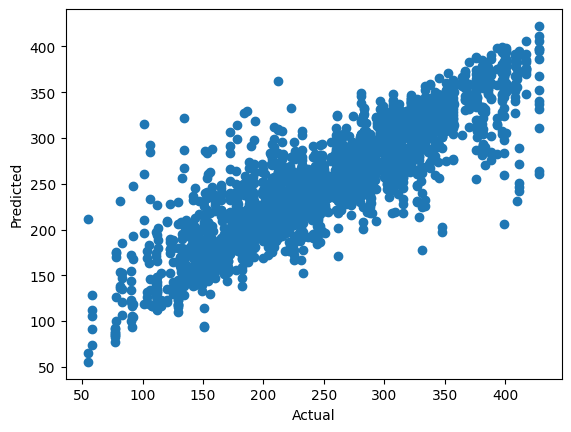

In [43]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

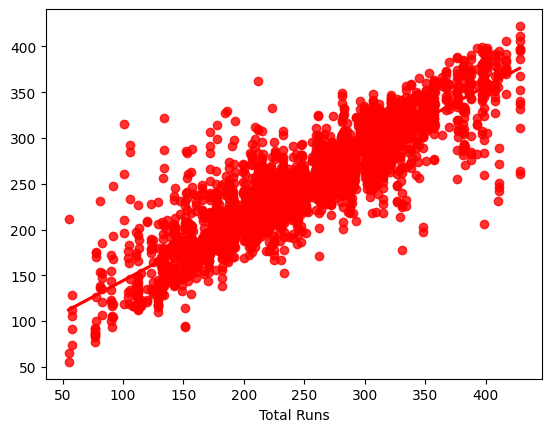

In [44]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [45]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
10044,260,280.27,-20.27
6679,285,292.88,-7.88
7585,186,196.56,-10.56
8847,310,297.42,12.58
7640,311,265.08,45.92
...,...,...,...
15359,174,190.40,-16.40
16372,169,181.50,-12.50
63,283,265.42,17.58
5146,280,288.04,-8.04
